##Importação de Bibliotecas e do Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Configuração para apresentar todas as colunas no display
pd.set_option("display.max_columns", None)

`Importanto o arquivo .CSV`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Walmart.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


## Visualização dos dados

In [ ]:
df.shape

(6435, 8)

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## **Pandas Profiling Report**

In [ ]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip
import pandas_profiling

In [ ]:
report = pandas_profiling.ProfileReport(df)

In [ ]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


# **Insights**

## 1.Através do Pandas Profiling Report, foi possivel observar:
* A base não possui valores faltantes e nem linhas duplicadas.

* Foi feito um levantamento dos índices da correlação de spearman onde concluiu-se que as variáveis quantitativas (número de vendas semanais, temperatura, preço do combustível, CPI e taxa de desemprego) não apresentaram correlação alta entre si.

* OBS.: Pela variável "holliday flag" ser uma variável binária, pode ter sua correlação avaliada através da correlação de Pearson, porém também não apresentou uma correlação alta com o número de vendas semanais.

In [ ]:
corrMat = df.corr(method='spearman')
corrMat

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.309227,0.000000,-0.026392,0.064878,-0.238852,0.304139
Weekly_Sales,-0.309227,1.000000,0.027774,-0.070962,0.025471,-0.055040,-0.062354
Holiday_Flag,0.000000,0.027774,1.000000,-0.143588,-0.080111,-0.004752,0.011177
Temperature,-0.026392,-0.070962,-0.143588,1.000000,0.128624,0.165957,0.038833
Fuel_Price,0.064878,0.025471,-0.080111,0.128624,1.000000,-0.045867,-0.064725
CPI,-0.238852,-0.055040,-0.004752,0.165957,-0.045867,1.000000,-0.388563
Unemployment,0.304139,-0.062354,0.011177,0.038833,-0.064725,-0.388563,1.000000


## 2.Preço médio de venda semanal por loja

In [ ]:
df['mean_store'] = df.groupby('Store')['Weekly_Sales'].transform('mean')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,mean_store
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1.555264e+06
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1.555264e+06
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1.555264e+06
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1.555264e+06
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1.555264e+06


In [ ]:
# Media de vendas semanal por loja 
df_test = df.groupby(['Store']).agg('mean')
df_test['Weekly_Sales'].sort_values(ascending=False).head(10)

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
Name: Weekly_Sales, dtype: float64

## 3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?

In [ ]:
df['Sales_total']=df.groupby('Store')['Weekly_Sales'].transform('sum')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,mean_store,Sales_total
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1.555264e+06,2.224028e+08
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1.555264e+06,2.224028e+08
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1.555264e+06,2.224028e+08
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1.555264e+06,2.224028e+08
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1.555264e+06,2.224028e+08


In [ ]:
df.sort_values('Sales_total',ascending=False).head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,mean_store,Sales_total
2754,20,22-10-2010,1893955.27,0,50.52,2.917,205.062788,7.484,2.107677e+06,3.013978e+08
2789,20,24-06-2011,1950826.32,0,72.40,3.804,208.230602,7.287,2.107677e+06,3.013978e+08
2768,20,28-01-2011,1761506.68,0,23.21,3.237,205.389495,7.343,2.107677e+06,3.013978e+08
2767,20,21-01-2011,1781805.66,0,27.43,3.229,205.046050,7.343,2.107677e+06,3.013978e+08
2766,20,14-01-2011,1884345.01,0,20.39,3.205,204.702604,7.343,2.107677e+06,3.013978e+08
2765,20,07-01-2011,1843030.95,0,31.43,3.193,204.648780,7.343,2.107677e+06,3.013978e+08
2764,20,31-12-2010,1799737.79,1,28.85,3.179,204.643227,7.484,2.107677e+06,3.013978e+08
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484,2.107677e+06,3.013978e+08
2762,20,17-12-2010,2819193.17,0,24.07,3.140,204.632119,7.484,2.107677e+06,3.013978e+08
2761,20,10-12-2010,2752122.08,0,24.27,3.109,204.687738,7.484,2.107677e+06,3.013978e+08


In [ ]:
#Foi possível constatar também que dentre as 10 semanas que maisvenderam no período, apenas 2 eram feriados e as 2 maiores eram véspera denatal.

In [ ]:
# Total de vendas semanal por loja 
df_test = df.groupby(['Store']).agg('sum')
df_test['Weekly_Sales'].sort_values(ascending=False).head(10)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64

In [ ]:
# a Loja 20 teve o maior acumulado de vendas

In [ ]:
loja20 = df[df['Store']==20]
loja20

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,mean_store,Sales_total
2717,20,05-02-2010,2401395.47,0,25.92,2.784,204.247194,8.187,2.107677e+06,3.013978e+08
2718,20,12-02-2010,2109107.90,1,22.12,2.773,204.385747,8.187,2.107677e+06,3.013978e+08
2719,20,19-02-2010,2161549.76,0,25.43,2.745,204.432100,8.187,2.107677e+06,3.013978e+08
2720,20,26-02-2010,1898193.95,0,32.32,2.754,204.463087,8.187,2.107677e+06,3.013978e+08
2721,20,05-03-2010,2119213.72,0,31.75,2.777,204.494073,8.187,2.107677e+06,3.013978e+08
...,...,...,...,...,...,...,...,...,...,...
2855,20,28-09-2012,2008350.58,0,58.65,3.997,215.736716,7.280,2.107677e+06,3.013978e+08
2856,20,05-10-2012,2246411.89,0,60.77,3.985,215.925886,7.293,2.107677e+06,3.013978e+08
2857,20,12-10-2012,2162951.36,0,47.20,4.000,216.115057,7.293,2.107677e+06,3.013978e+08
2858,20,19-10-2012,1999363.49,0,56.26,3.969,216.146470,7.293,2.107677e+06,3.013978e+08


In [ ]:
# Semanas que a loja 20 ficou acima da média:
loja20_acima_media = loja20[(loja20['Weekly_Sales']) > df['Weekly_Sales'].mean()]
loja20_acima_media.shape

(143, 10)

In [ ]:
# A loja 20 teve vendas acima da media em todas as semanas do periodo estudado.

In [ ]:
df['Up_Sales'] = np.where(df['Weekly_Sales'] >=  df['Weekly_Sales'].mean(), 1,0)
# Semanas acima da média para cada loja  
df_test = df.groupby(['Store']).agg('sum')
df_test['Up_Sales'].sort_values(ascending=False).head(20)

Store
1     143
19    143
39    143
4     143
31    143
6     143
28    143
27    143
24    143
10    143
11    143
2     143
13    143
14    143
20    143
23    139
32    137
41    136
18     86
26     40
Name: Up_Sales, dtype: int64

##4.Vendas máximas, mínimas e médias de todas as lojas ao longo do tempo.

In [ ]:
mmm = df.groupby('Store').agg({'Weekly_Sales':['max', 'min', 'mean']})
mmm.head()

Weekly_Sales                          
               max         min          mean
Store                                       
1       2387950.20  1316899.31  1.555264e+06
2       3436007.68  1650394.44  1.925751e+06
3        605990.41   339597.38  4.027044e+05
4       3676388.98  1762539.30  2.094713e+06
5        507900.07   260636.71  3.180118e+05

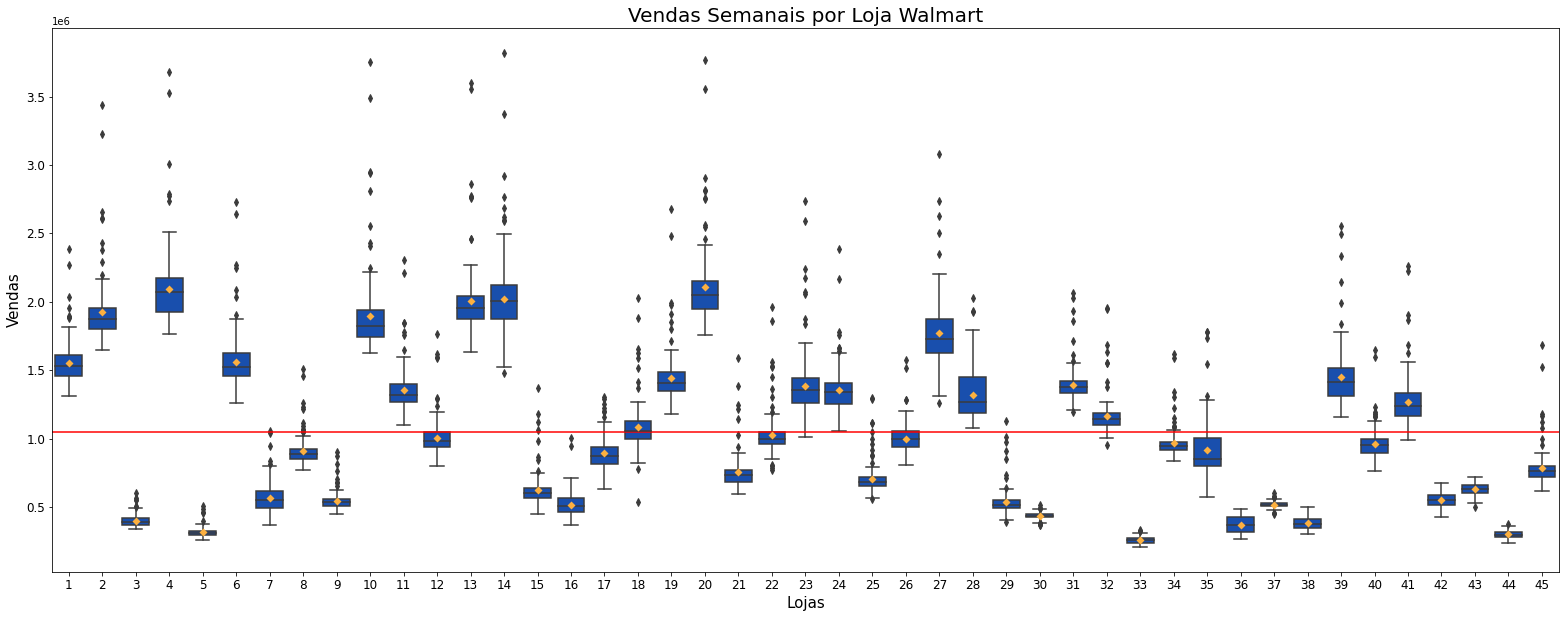

In [ ]:
plt.figure(figsize=(27, 10))
sns.boxplot(x="Store", 
            y="Weekly_Sales", 
            data=df,
            color="#0049c6", 
            showmeans=True, 
            meanprops={"marker": "D", 
                       "markeredgecolor": "none",
                       "markerfacecolor":"#FCB040", 
                       "markersize": "6"} )
plt.title("Vendas Semanais por Loja Walmart",fontsize=20)
plt.ylabel("Vendas", fontsize= 15)
plt.xlabel("Lojas",fontsize=15)
plt.tick_params(labelsize=12)
plt.axhline(y=df['Weekly_Sales'].mean(),color="red")
plt.show()
# A linha vermelha no grafico represente a media de vendas semanal. Quanto mais destante o limite inferior estiver da minha vermelha melhor será para a loja em quesito de vendas

## 5. Preços de combustível na região da loja 

In [ ]:
# A tendência é que quanto menor for o combustivel mais as pessoas vão sair, possibilitando irem mais vezes as lojas de departamento

In [ ]:
# Media do preço do combustivel
df['Fuel_Price'].mean()

3.358606837606838

In [ ]:
# Lojas que estão em região com menores preço de combustivel
df_test = df.groupby(['Store']).agg('mean')
df_test['Fuel_Price'].sort_values(ascending=True).head(10)

Store
36    3.204203
34    3.216972
4     3.216972
1     3.219699
21    3.219699
37    3.219699
39    3.219699
31    3.219699
11    3.219699
30    3.219699
Name: Fuel_Price, dtype: float64

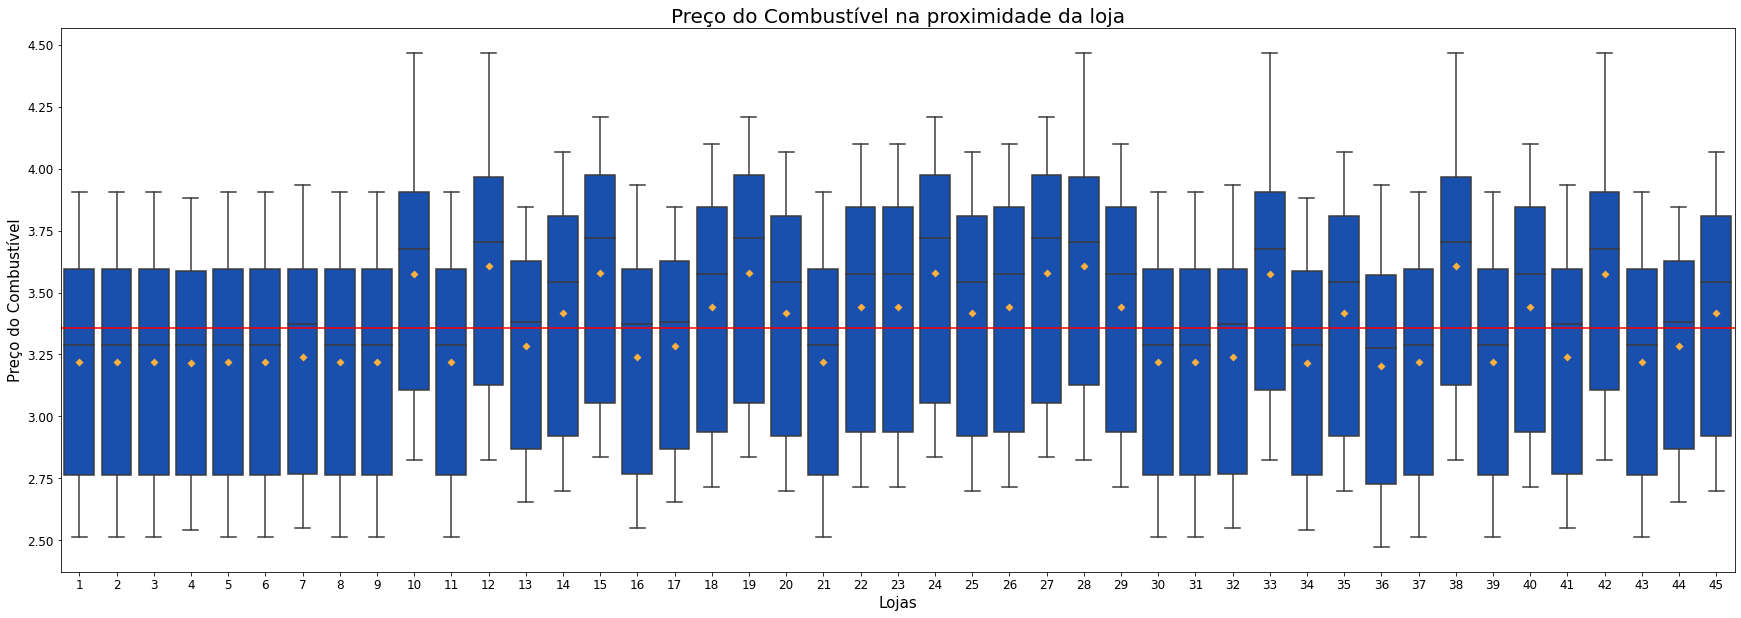

In [ ]:
#Com o boxplot, a visualização fica melhor
plt.figure(figsize=(30, 10))
sns.boxplot(x="Store", 
            y="Fuel_Price", 
            data=df,
            color="#0049c6",
            showmeans=True, 
            meanprops={"marker": "D", 
                       "markeredgecolor": "none",
                       "markerfacecolor":"#FCB040", 
                       "markersize": "6"} )
plt.title("Preço do Combustível na proximidade da loja",fontsize=20)
plt.ylabel("Preço do Combustível", fontsize= 15)
plt.xlabel("Lojas",fontsize=15)
plt.tick_params(labelsize=12)
# A linha vermelha no grafico represente a media do preço da gasolina nas proximidades.Quanto mais abaixo a media e mediana estiverem da linha vermelha, melhor a loja será ranqueada nessa metrica.
plt.axhline(y=df['Fuel_Price'].mean(),color="red")
plt.show()

## 6. Comparativo de índice de Preços ao Consumidor (CPI)

In [ ]:
#CPI = Trata-se de uma medida da variação média ao longo do tempo dos preços pagos pelos consumidores urbanos por uma cesta de bens de consumo e serviços.
#Logo, manto menor for o valor, mais barato serão os bens de consumo e por isso há probabilidade dos clientes consumirem produtos.

In [ ]:
df_test = df.groupby(['Store']).agg('mean')
df_test['CPI'].sort_values(ascending=True).head(10)

Store
28    128.679669
42    128.679669
4     128.679669
38    128.679669
34    128.679669
33    128.679669
10    128.679669
44    128.679669
12    128.679669
13    128.679669
Name: CPI, dtype: float64

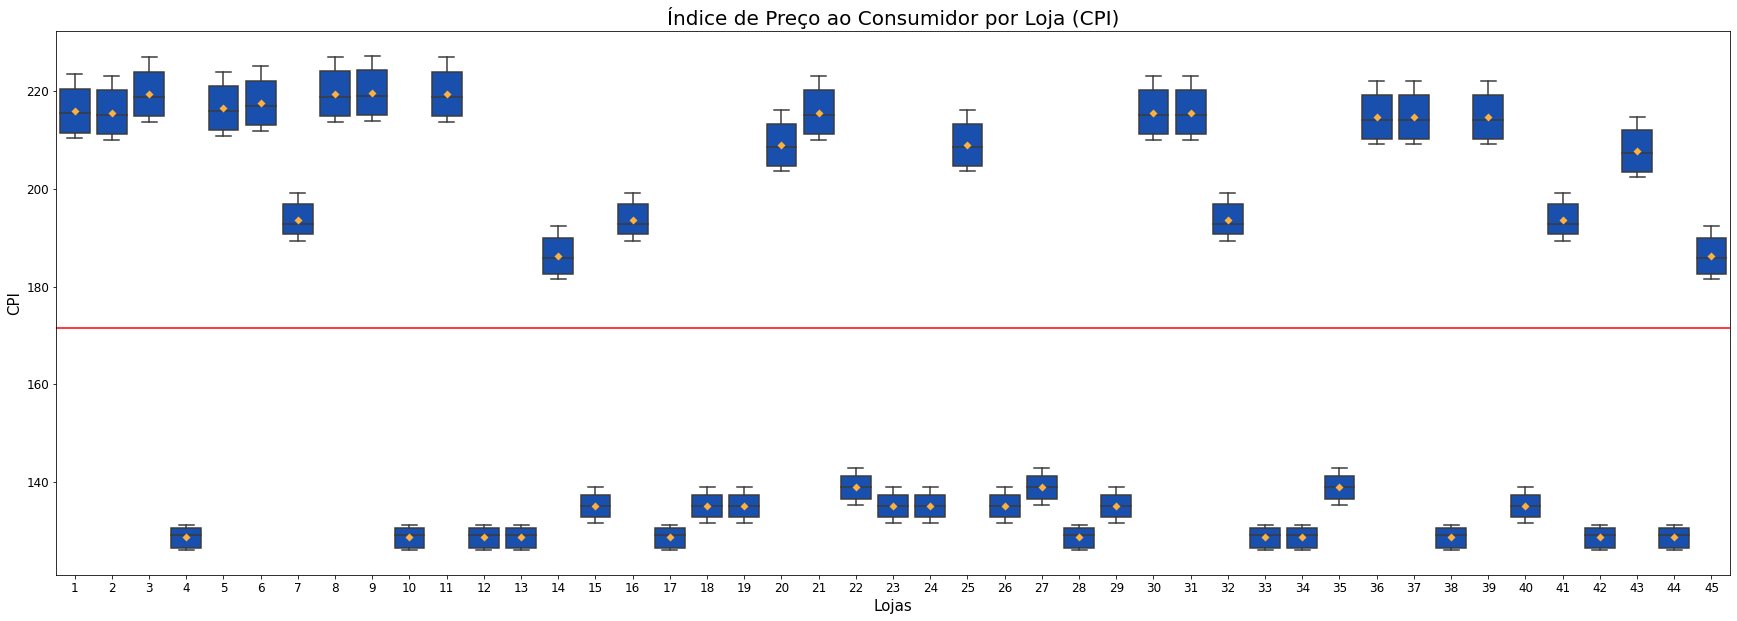

In [ ]:
#Com o boxplot, a visualização fica melhor
plt.figure(figsize=(30, 10))
sns.boxplot(x="Store", 
            y="CPI", 
            data=df,
            color="#0049c6",
            showmeans=True, 
            meanprops={"marker": "D", 
                       "markeredgecolor": "none",
                       "markerfacecolor":"#FCB040", 
                       "markersize": "6"} )
plt.title("Índice de Preço ao Consumidor por Loja (CPI)",fontsize=20)
plt.ylabel("CPI", fontsize= 15)
plt.xlabel("Lojas",fontsize=15)
plt.tick_params(labelsize=12)
# A linha vermelha no grafico represente a media do CPI.Quanto mais abaixo a a media da loja estiver da linha vermelha, melhor a loja será ranqueada nessa metrica.
plt.axhline(y=df['CPI'].mean(),color="red")
plt.show()

## 7.Taxa de desemprego

In [ ]:
# Uma pessoa desempregada tem a tendencia de gastar menos que uma pessoa empregada.Logo, quanto maior a taxa de desemprego menor será menor será seu gasto.
# Por isso, para essa metrica quanto menor a taxa, melhor o rank. 

In [ ]:
# df_test = df.groupby(['Store']).agg('mean')
# df_test['Unemployment'].sort_values(ascending=True).head(10)
df.groupby('Store')['Unemployment'].mean().sort_values(ascending=True).head(10)

Store
23    4.796014
40    4.796014
4     5.964692
8     6.091846
9     6.099881
5     6.295406
16    6.477993
17    6.549406
6     6.606902
44    6.735622
Name: Unemployment, dtype: float64

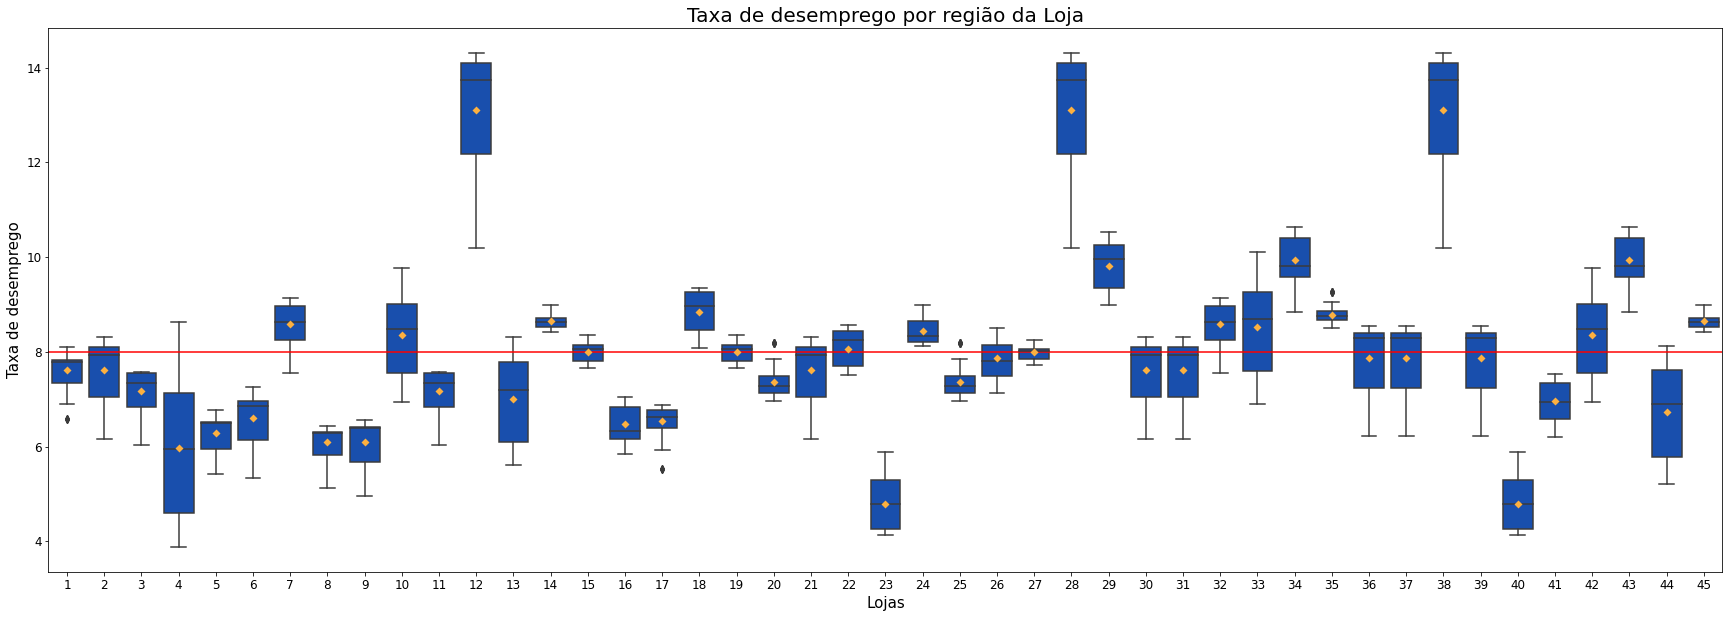

In [ ]:
#Com o boxplot, a visualização fica melhor
plt.figure(figsize=(30, 10))
sns.boxplot(x="Store", 
            y="Unemployment", 
            data=df,
            color="#0049c6",
            showmeans=True, 
            meanprops={"marker": "D", 
                       "markeredgecolor": "none",
                       "markerfacecolor":"#FCB040", 
                       "markersize": "6"} )
plt.title("Taxa de desemprego por região da Loja",fontsize=20)
plt.ylabel("Taxa de desemprego", fontsize= 15)
plt.xlabel("Lojas",fontsize=15)
plt.tick_params(labelsize=12)
# A linha vermelha no grafico represente a media da taxa de desemprego.Quanto mais abaixo a media da loja estiver da linha vermelha melhor a loja será ranqueada nessa metrica.
plt.axhline(y=df['Unemployment'].mean(),color="red")
plt.show()

## 8. Índice de temperatura

In [ ]:
#Nossa habilidade manual começa a ficar crítica quando a temperatura atinge a casa dos 12°C. Já a sensibilidade ao toque é comprometida aos 8°C.
#Colando 8°C = 46,40°F,como "temperatura critica".

In [ ]:
df.groupby('Store')['Temperature'].mean().sort_values(ascending=False).head(10)

Store
33    76.728182
11    72.480769
42    72.241189
10    72.241189
3     71.434196
36    71.160350
37    71.160350
39    70.597343
38    70.262797
28    70.262797
Name: Temperature, dtype: float64

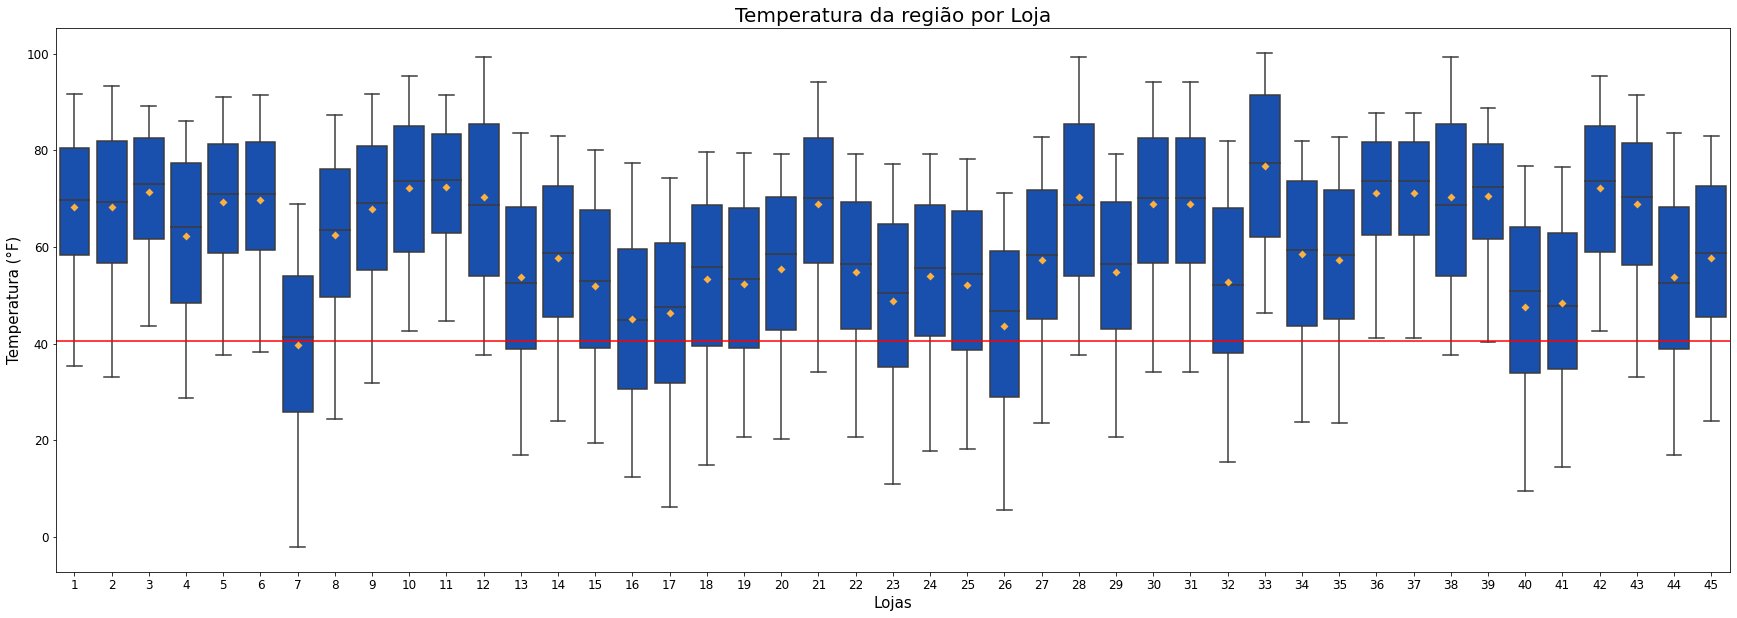

In [ ]:
#Com o boxplot, a visualização fica melhor
plt.figure(figsize=(30, 10))
sns.boxplot(x="Store", 
            y="Temperature", 
            data=df,
            color="#0049c6",
            showmeans=True, 
            meanprops={"marker": "D", 
                       "markeredgecolor": "none",
                       "markerfacecolor":"#FCB040", 
                       "markersize": "6"} )
plt.title("Temperatura da região por Loja",fontsize=20)
plt.ylabel("Temperatura (°F)", fontsize= 15)
plt.xlabel("Lojas",fontsize=15)
plt.tick_params(labelsize=12)
# A linha vermelha no grafico represente a media da temperatura da região.Quanto mais acima a media da loja estiver da linha vermelha, melhor a loja será ranqueada nessa metrica.
plt.axhline(y=40.46,color="red")
plt.show()

## Conclusão

In [ ]:
# Essa parte foi só feita para confirmar a analise feita anteriormente

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,mean_store,Sales_total,Up_Sales
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1.555264e+06,2.224028e+08,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1.555264e+06,2.224028e+08,1
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1.555264e+06,2.224028e+08,1
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1.555264e+06,2.224028e+08,1
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1.555264e+06,2.224028e+08,1


In [ ]:
print('media de vendas por semana: {} \nmedia taxa de desemprego: {} \nTemperatura Critica: {}°F \nmedia do CPI: {} \nmedia do Preço do combustivel: {} \n'.format(df['Weekly_Sales'].mean(),df['Unemployment'].mean(),40.46,df['CPI'].mean(),df['Fuel_Price'].mean()))

media de vendas por semana: 1046964.8775617715 
media taxa de desemprego: 7.99915104895105 
Temperatura Critica: 40.46°F 
media do CPI: 171.57839384878014 
media do Preço do combustivel: 3.358606837606838 



In [ ]:
df.groupby('Store').agg({'Weekly_Sales':['mean', 'sum'],'Unemployment':['mean'], 'Temperature':['mean'], 'CPI':['mean'], 'Fuel_Price':['mean']}).sort_values(('Weekly_Sales', 'sum'), ascending = False).head(10)

Weekly_Sales               Unemployment Temperature         CPI  \
               mean           sum         mean        mean        mean   
Store                                                                    
20     2.107677e+06  3.013978e+08     7.371413   55.451399  209.038131   
4      2.094713e+06  2.995440e+08     5.964692   62.253357  128.679669   
14     2.020978e+06  2.889999e+08     8.648748   57.790979  186.285678   
13     2.003620e+06  2.865177e+08     7.001825   53.697133  128.679669   
2      1.925751e+06  2.753824e+08     7.623846   68.216364  215.646311   
10     1.899425e+06  2.716177e+08     8.362965   72.241189  128.679669   
27     1.775216e+06  2.538559e+08     8.001748   57.311119  139.011284   
6      1.564728e+06  2.237561e+08     6.606902   69.700000  217.553197   
1      1.555264e+06  2.224028e+08     7.610420   68.306783  215.996892   
39     1.450668e+06  2.074455e+08     7.869049   70.597343  214.729069   

      Fuel_Price  
            mean  
Store             
20      3.417608  
4       3.216972  
14      3.417608  
13      3.286147  
2       3.219699  
10      3.575923  
27      3.578294  
6       3.219699  
1       3.219699  
39      3.219699

In [ ]:
# Após todo o processo de analise, a loja 04 é a loja escolhida para ter uma expansão porque além de estar entre as 5 lojas com mais vendas no período, 
# apresenta boa classificação nas outras metricas.